In [21]:
import matplotlib.pyplot as plt
import matplotlib.animation as manimation
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cmocean
import warnings
import os
import sys
import datetime as dt

In [3]:
nl = dict(zip( ['CanCM4i', 'COLA-RSMAS-CCSM4', 'GEM-NEMO', 'GFDL-SPEAR', 'NASA-GEOSS2S', 'NCEP-CFSv2', 'CanESM5', 'GEM5.2-NEMO', 'GEM5-NEMO', 'CanCM4i-IC3',],
               [       11,                 11,         11,           11,              8,            9,        11,            11,          11,            11,])) 
modict={'Jacox':['CanCM4i', 'COLA-RSMAS-CCSM4', 'GEM-NEMO', 'GFDL-SPEAR', 
                        'NASA-GEOSS2S', 'NCEP-CFSv2'],
        'CanSIPSv2':['CanCM4i','GEM-NEMO'],
        'CanSIPSv21':['CanCM4i-IC3','GEM5-NEMO'],
        'CanSIPSv3':['CanESM5','GEM5.2-NEMO'],
        'GFDLNASA':[ 'GFDL-SPEAR','NASA-GEOSS2S'],}

In [17]:
basepath='/space/hall5/sitestore/eccc/crd/ccrn/users/reo000/work/MHW'
years = [1991, 2020]
mhwdir = basepath+'/mhw/detrended';
f_obs = basepath+f'/OISST/mhw_detrended_oisst-avhrr-v02r01.regridded1x1.monthly.{years[0]}_{years[-1]}.nc'
fobs=xr.open_dataset(f_obs)
mods=modict['CanSIPSv3']
il=3 # 3 months lead time
flist=[]
for modi in mods:
    if il<nl[modi]:
        # Load MHWs
        f_in = f'{mhwdir}/mhw_{modi}_l{il}_detrended_{years[0]}_{years[1]}.nc'
        flist.append(f_in)
ffor=xr.open_mfdataset(flist,chunks={'time':1,'X':-1,'Y':-1,'M':-1},concat_dim='M',combine='nested',data_vars='minimal',
                   coords='minimal',parallel=True,preprocess=lambda f: f.drop_vars(["sst_an_thr","mhw_prob"]))
M=40
mhwfor=ffor.is_mhw.data[:(-1*il),...].sum(axis=1)/M if il>0 else ffor.is_mhw.data.sum(axis=1)/M
mhwobs=fobs.is_mhw.data[il:,...]

In [18]:
mhwfor

dask.array<truediv, shape=(357, 181, 360), dtype=float64, chunksize=(357, 181, 360), chunktype=numpy.ndarray>

In [19]:
mhwobs

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

Text(0.5, 0.98, '1991-04-15 00:00:00')

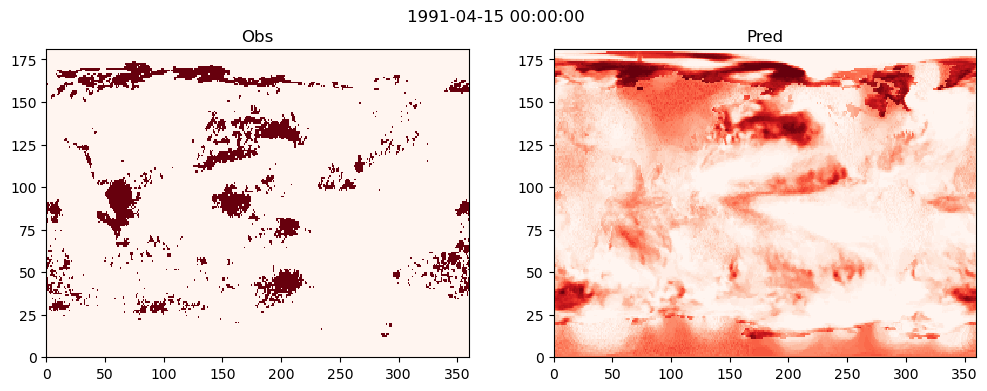

In [22]:
# Define the meta data for the movie
cmap=plt.get_cmap('Reds')
cmap.set_bad('gray')
# Initialize the movie
fig,ax = plt.subplots(1,2,figsize=(12,4))
ax[0].set_title('Obs')
ax[1].set_title('Pred')
# Update the frames for the movie
i=0
ax[0].pcolormesh(mhwobs[i,...],vmin=0,vmax=1,cmap=cmap)
ax[1].pcolormesh(mhwfor[i,...],vmin=0,vmax=1,cmap=cmap)
date=dt.datetime(years[0]+int((i+il+1)/12),(i+il+1)%12,15)
fig.suptitle(date)

MovieWriter stderr:
[in#0/rawvideo @ 0x556a6c5c3c40] Error during demuxing: Immediate exit requested



CalledProcessError: Command '['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '1200x400', '-pix_fmt', 'rgba', '-framerate', '1', '-loglevel', 'error', '-i', 'pipe:', '-vcodec', 'h264', '-pix_fmt', 'yuv420p', '-metadata', 'title=MHW Movie lead=3.5', '-metadata', 'artist=Matplotlib', '-metadata', 'comment=predictions il=3', '-y', 'MHW0.mp4']' returned non-zero exit status 255.

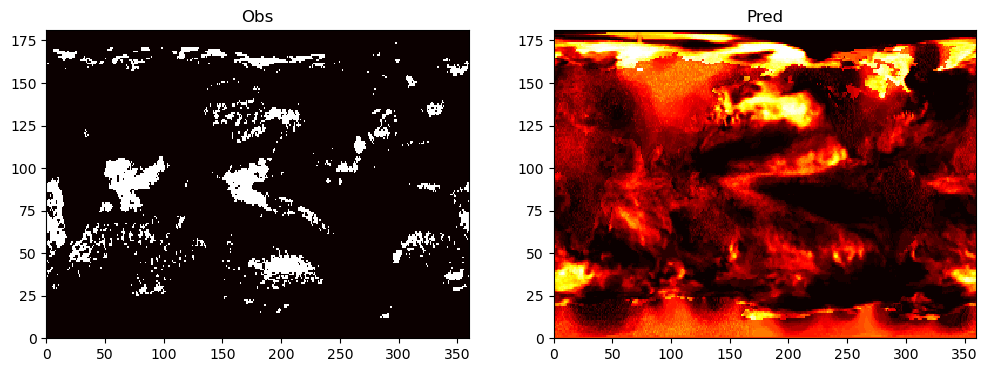

In [11]:
# Define the meta data for the movie
FFMpegWriter = manimation.writers['ffmpeg']
metadata = dict(title='MHW Movie lead=3.5', artist='Matplotlib',
                comment='predictions il=3')
writer = FFMpegWriter(fps=1, metadata=metadata)
cmap=plt.get_cmap('hot_r')
cmap.set_bad('gray')
# Initialize the movie
fig,ax = plt.subplots(1,2,figsize=(12,4))
ax[0].set_title('Obs')
ax[1].set_title('Pred')
# Update the frames for the movie
with writer.saving(fig, "MHW0.mp4", dpi=100):
    for i in range(5):#np.shape(mhwobs)[0]
        ax[0].pcolormesh(mhwobs[i,...],vmin=0,vmax=1,cmap=cmap)
        ax[1].pcolormesh(mhwfor[i,...].sum(axis=0)/40,vmin=0,vmax=1,cmap=cmap)
        date=dt.datetime(years[0]+int((i+il+1)/12),(i+il+1)%12,15)
        fig.suptitle(date)
        writer.grab_frame()